# Looking at cross session decoding only for pre and post sessions (can use more cells when only comparing these sessions)

In [15]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [16]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [17]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_across_combined_PrPoRe_FIGURES'

In [18]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [19]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [20]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [21]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=10, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5, color=colors)
    return sig_value, p

In [22]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [23]:
sessions = 'pre', 'post', 'renew'

In [24]:
all_comparisons = 'prepost_patterns_pre',
'prepost_patterns_post',\
'prerenew_patterns_pre',\
'prerenew_patterns_renew',\
'postrenew_patterns_post',\
'postrenew_patterns_renew',\

('prepost_patterns_post',
 'prerenew_patterns_pre',
 'prerenew_patterns_renew',
 'postrenew_patterns_post',
 'postrenew_patterns_renew')

In [25]:
for reg in ['dhpc','vhpc']:
    exec("distinct_CS_%s = ut.load_variable('scores_CS_241',\
        '../notebooks/autorestore/decoding_across_session_combined_%s_1sec/')"%(reg,reg))
    exec("distinct_tr_%s = ut.load_variable('scores_tr_241',\
        '../notebooks/autorestore/decoding_across_session_combined_%s_1sec/')"%(reg,reg))

In [26]:
distinct_CS_vhpc.keys()

['postext2_ext2',
 'postext1',
 'postext2',
 'prerenew_renew',
 'ext1ext2',
 'postext1_post',
 'd2renew',
 'prepost_post',
 'ext1renew',
 'postrenew_renew',
 'prerenew',
 'ext1renew_ext1',
 'ext1ext2_ext2',
 'postext1_ext1',
 'ext1ext2_ext1',
 'preext1_ext1',
 'preext2',
 'preext1',
 'prepost_pre',
 'preext1_pre',
 'd2ext2',
 'd2ext1',
 'ext2renew_renew',
 'prepost',
 'postrenew',
 'postrenew_post',
 'ext2renew_ext2',
 'ext2renew',
 'preext2_ext2',
 'ext1renew_renew',
 'pred2',
 'postext2_post',
 'd2post',
 'preext2_pre',
 'prerenew_pre']

In [27]:
to_plot = ['prepost_pre','prepost_post','prepost']
dark_co = ['darkcyan','firebrick','#262626']

vCA1 prepost_pre prepost_post U = 0.0 p = 0.000363302292183 r = -0.845154254729
None
dCA1 prepost_pre prepost_post U = 56.0 p = 1.3542528913 r = 0.101418510567
None
vCA1 prepost_post prepost U = 100.0 p = 0.000361269441615 r = 0.845154254729
None
dCA1 prepost_post prepost U = 100.0 p = 0.000359245009981 r = 0.845154254729
None
vCA1 prepost_pre prepost U = 87.0 p = 0.0114806287986 r = 0.625414148499
None
dCA1 prepost_pre prepost U = 99.0 p = 0.000484347571477 r = 0.828251169634
None


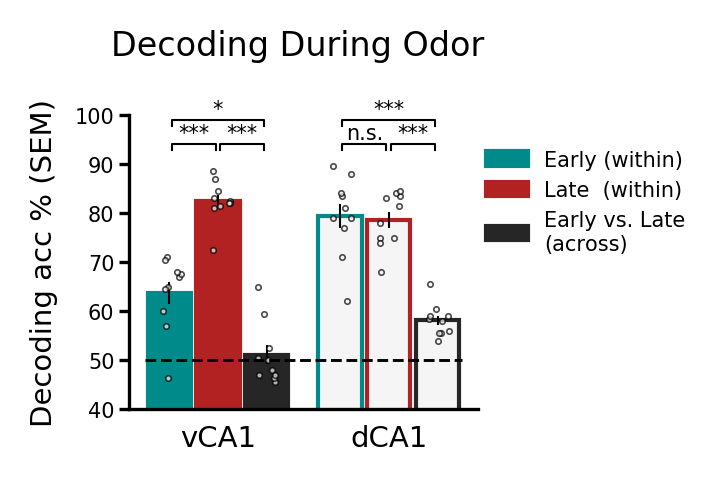

In [49]:
from matplotlib.patches import Patch
width = 0.89  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.5,1.3))
for sess,i,lab in zip(to_plot,range(3),['Early (within)','Late  (within)','Early vs. Late\n(across)']):
    v[sess] = np.array(np.std(distinct_CS_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(distinct_CS_vhpc[sess][:loops])*100, width, color=dark_co[i],edgecolor=dark_co[i],yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(distinct_CS_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(distinct_CS_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 3.5,  np.mean(distinct_CS_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[i],yerr=d[sess])
    ax.scatter(i+3.5+np.random.random(loops)*width/2-width/4.5,np.array(distinct_CS_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([1,4.5])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for i in range(2):
    pvs.append(add_significance(ax, distinct_CS_vhpc[to_plot[i]][:loops], distinct_CS_vhpc[to_plot[i+1]][:loops],
        i+.05,i+.95,94,mcc=2))
    pvs.append(add_significance(ax, distinct_CS_dhpc[to_plot[i]][:loops], distinct_CS_dhpc[to_plot[i+1]][:loops],
        i+3.55,i+4.45,94,mcc=2))
    print "vCA1",to_plot[i],to_plot[i+1],report_stats(distinct_CS_vhpc[to_plot[i]][:loops], distinct_CS_vhpc[to_plot[i+1]][:loops],mcc=2)
    print "dCA1",to_plot[i],to_plot[i+1],report_stats(distinct_CS_dhpc[to_plot[i]][:loops], distinct_CS_dhpc[to_plot[i+1]][:loops],mcc=2)
for i in range(1):
    pvs.append(add_significance(ax, distinct_CS_vhpc[to_plot[i]][:loops], distinct_CS_vhpc[to_plot[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=2))
    pvs.append(add_significance(ax, distinct_CS_dhpc[to_plot[i]][:loops], distinct_CS_dhpc[to_plot[i+2]][:loops],
        i+3.55,i+5.45,99+i*5,mcc=2))
    print "vCA1",to_plot[i],to_plot[i+2],report_stats(distinct_CS_vhpc[to_plot[i]][:loops], distinct_CS_vhpc[to_plot[i+2]][:loops],mcc=2)
    print "dCA1",to_plot[i],to_plot[i+2],report_stats(distinct_CS_dhpc[to_plot[i]][:loops], distinct_CS_dhpc[to_plot[i+2]][:loops],mcc=2)
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Odor',y=1.1,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_CS.pdf'%NOTEBOOK_NAME)

vCA1 prepost_pre prepost_post U = 2.0 p = 0.000652868899803 r = -0.811348084539
None
dCA1 prepost_pre prepost_post U = 0.0 p = 0.000359245009981 r = -0.845154254729
None
vCA1 prepost_post prepost U = 100.0 p = 0.000361269441615 r = 0.845154254729
None
dCA1 prepost_post prepost U = 100.0 p = 0.000359245009981 r = 0.845154254729
None
vCA1 prepost_pre prepost U = 75.0 p = 0.125647196898 r = 0.422577127364
None
dCA1 prepost_pre prepost U = 64.0 p = 0.613156990416 r = 0.236643191324
None


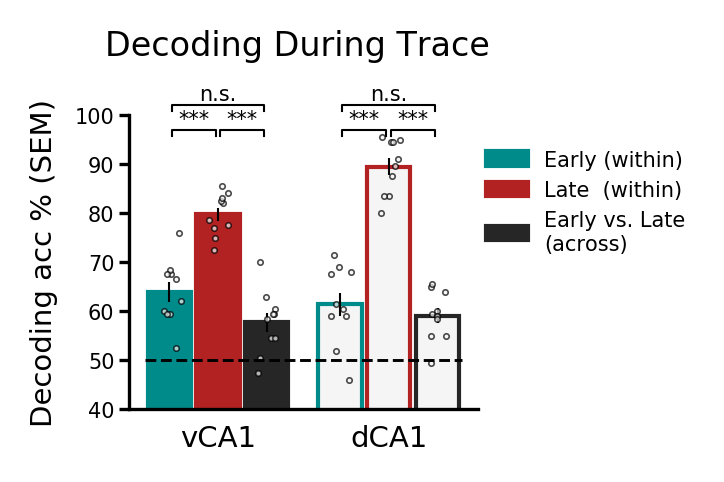

In [48]:
from matplotlib.patches import Patch
width = 0.89  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.5,1.3))
for sess,i,lab in zip(to_plot,range(3),['Early (within)','Late  (within)','Early vs. Late\n(across)']):
    v[sess] = np.array(np.std(distinct_tr_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(distinct_tr_vhpc[sess][:loops])*100, width, color=dark_co[i],edgecolor=dark_co[i],yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(distinct_tr_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(distinct_tr_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 3.5,  np.mean(distinct_tr_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[i],yerr=d[sess])
    ax.scatter(i+3.5+np.random.random(loops)*width/2-width/4.5,np.array(distinct_tr_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([1,4.5])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for i in range(2):
    pvs.append(add_significance(ax, distinct_tr_vhpc[to_plot[i]][:loops], distinct_tr_vhpc[to_plot[i+1]][:loops],
        i+.05,i+.95,97,mcc=2))
    pvs.append(add_significance(ax, distinct_tr_dhpc[to_plot[i]][:loops], distinct_tr_dhpc[to_plot[i+1]][:loops],
        i+3.55,i+4.45,97,mcc=2))
    print "vCA1",to_plot[i],to_plot[i+1],report_stats(distinct_tr_vhpc[to_plot[i]][:loops], distinct_tr_vhpc[to_plot[i+1]][:loops],mcc=2)
    print "dCA1",to_plot[i],to_plot[i+1],report_stats(distinct_tr_dhpc[to_plot[i]][:loops], distinct_tr_dhpc[to_plot[i+1]][:loops],mcc=2)
for i in range(1):
    pvs.append(add_significance(ax, distinct_tr_vhpc[to_plot[i]][:loops], distinct_tr_vhpc[to_plot[i+2]][:loops],
        i+.05,i+1.95,102+i*5,mcc=2))
    pvs.append(add_significance(ax, distinct_tr_dhpc[to_plot[i]][:loops], distinct_tr_dhpc[to_plot[i+2]][:loops],
        i+3.55,i+5.45,102+i*5,mcc=2))
    print "vCA1",to_plot[i],to_plot[i+2],report_stats(distinct_tr_vhpc[to_plot[i]][:loops], distinct_tr_vhpc[to_plot[i+2]][:loops],mcc=2)
    print "dCA1",to_plot[i],to_plot[i+2],report_stats(distinct_tr_dhpc[to_plot[i]][:loops], distinct_tr_dhpc[to_plot[i+2]][:loops],mcc=2)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace',y=1.1,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_tr.pdf'%NOTEBOOK_NAME)

In [43]:
to_plot2 = ['postrenew_post','postrenew_renew','postrenew']
dark_co2 = ['firebrick','goldenrod','#262626']

vCA1 postrenew_post postrenew_renew U = 51.5 p = 1.87939543764 r = 0.0253546276419
None
dCA1 postrenew_post postrenew_renew U = 55.0 p = 1.46688125179 r = 0.0845154254729
None
vCA1 postrenew_renew postrenew U = 92.5 p = 0.00296090326298 r = 0.718381116519
None
dCA1 postrenew_renew postrenew U = 96.0 p = 0.00114355393089 r = 0.77754191435
None
vCA1 postrenew_post postrenew U = 81.5 p = 0.038039498976 r = 0.532447180479
None
dCA1 postrenew_post postrenew U = 77.0 p = 0.089824624822 r = 0.456383297553
None


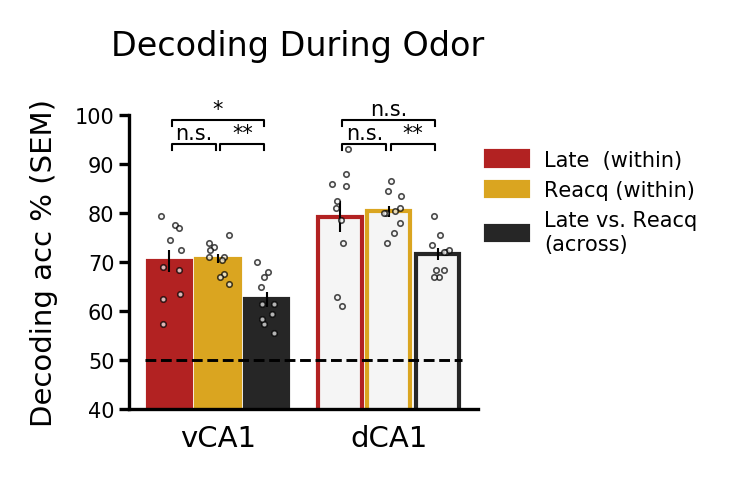

In [46]:
from matplotlib.patches import Patch
width = 0.89  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.5,1.3))
for sess,i,lab in zip(to_plot2,range(3),['Late  (within)','Reacq (within)','Late vs. Reacq\n(across)']):
    v[sess] = np.array(np.std(distinct_CS_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(distinct_CS_vhpc[sess][:loops])*100, width, color=dark_co2[i],edgecolor=dark_co2[i],yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(distinct_CS_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(distinct_CS_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 3.5,  np.mean(distinct_CS_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co2[i],yerr=d[sess])
    ax.scatter(i+3.5+np.random.random(loops)*width/2-width/4.5,np.array(distinct_CS_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([1,4.5])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for i in range(2):
    pvs.append(add_significance(ax, distinct_CS_vhpc[to_plot2[i]][:loops], distinct_CS_vhpc[to_plot2[i+1]][:loops],
        i+.05,i+.95,94,mcc=2))
    pvs.append(add_significance(ax, distinct_CS_dhpc[to_plot2[i]][:loops], distinct_CS_dhpc[to_plot2[i+1]][:loops],
        i+3.55,i+4.45,94,mcc=2))
    print "vCA1",to_plot2[i],to_plot2[i+1],report_stats(distinct_CS_vhpc[to_plot2[i]][:loops], distinct_CS_vhpc[to_plot2[i+1]][:loops],mcc=2)
    print "dCA1",to_plot2[i],to_plot2[i+1],report_stats(distinct_CS_dhpc[to_plot2[i]][:loops], distinct_CS_dhpc[to_plot2[i+1]][:loops],mcc=2)
for i in range(1):
    pvs.append(add_significance(ax, distinct_CS_vhpc[to_plot2[i]][:loops], distinct_CS_vhpc[to_plot2[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=2))
    pvs.append(add_significance(ax, distinct_CS_dhpc[to_plot2[i]][:loops], distinct_CS_dhpc[to_plot2[i+2]][:loops],
        i+3.55,i+5.45,99+i*5,mcc=2))
    print "vCA1",to_plot2[i],to_plot2[i+2],report_stats(distinct_CS_vhpc[to_plot2[i]][:loops], distinct_CS_vhpc[to_plot2[i+2]][:loops],mcc=2)
    print "dCA1",to_plot2[i],to_plot2[i+2],report_stats(distinct_CS_dhpc[to_plot2[i]][:loops], distinct_CS_dhpc[to_plot2[i+2]][:loops],mcc=2)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Odor',y=1.1,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_CS_PoRe.pdf'%NOTEBOOK_NAME)

vCA1 postrenew_post postrenew_renew U = 45.0 p = 1.46707437446 r = -0.0845154254729
None
dCA1 postrenew_post postrenew_renew U = 78.0 p = 0.0745529264097 r = 0.473286382648
None
vCA1 postrenew_renew postrenew U = 81.0 p = 0.0418807073079 r = 0.523995637932
None
dCA1 postrenew_renew postrenew U = 83.0 p = 0.0276791849836 r = 0.557801808121
None
vCA1 postrenew_post postrenew U = 72.0 p = 0.207699163594 r = 0.371867872081
None
dCA1 postrenew_post postrenew U = 92.5 p = 0.0029731516271 r = 0.718381116519
None


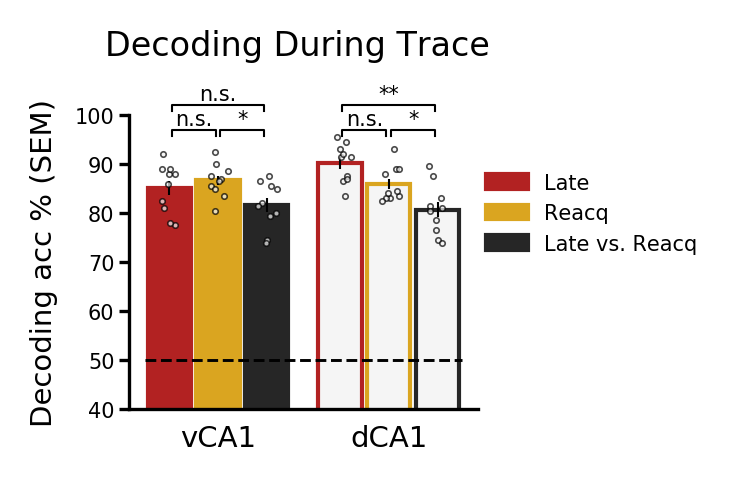

In [47]:
from matplotlib.patches import Patch
width = 0.89  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.5,1.3))
for sess,i,lab in zip(to_plot2,range(3),['Late','Reacq','Late vs. Reacq']):
    v[sess] = np.array(np.std(distinct_tr_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(distinct_tr_vhpc[sess][:loops])*100, width, color=dark_co2[i],edgecolor=dark_co2[i],yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(distinct_tr_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(distinct_tr_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 3.5,  np.mean(distinct_tr_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co2[i],yerr=d[sess])
    ax.scatter(i+3.5+np.random.random(loops)*width/2-width/4.5,np.array(distinct_tr_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([1,4.5])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for i in range(2):
    pvs.append(add_significance(ax, distinct_tr_vhpc[to_plot2[i]][:loops], distinct_tr_vhpc[to_plot2[i+1]][:loops],
        i+.05,i+.95,97,mcc=2))
    pvs.append(add_significance(ax, distinct_tr_dhpc[to_plot2[i]][:loops], distinct_tr_dhpc[to_plot2[i+1]][:loops],
        i+3.55,i+4.45,97,mcc=2))
    print "vCA1",to_plot2[i],to_plot2[i+1],report_stats(distinct_tr_vhpc[to_plot2[i]][:loops], distinct_tr_vhpc[to_plot2[i+1]][:loops],mcc=2)
    print "dCA1",to_plot2[i],to_plot2[i+1],report_stats(distinct_tr_dhpc[to_plot2[i]][:loops], distinct_tr_dhpc[to_plot2[i+1]][:loops],mcc=2)
    
for i in range(1):
    pvs.append(add_significance(ax, distinct_tr_vhpc[to_plot2[i]][:loops], distinct_tr_vhpc[to_plot2[i+2]][:loops],
        i+.05,i+1.95,102+i*5,mcc=2))
    pvs.append(add_significance(ax, distinct_tr_dhpc[to_plot2[i]][:loops], distinct_tr_dhpc[to_plot2[i+2]][:loops],
        i+3.55,i+5.45,102+i*5,mcc=2))
    print "vCA1",to_plot2[i],to_plot2[i+2],report_stats(distinct_tr_vhpc[to_plot2[i]][:loops], distinct_tr_vhpc[to_plot2[i+2]][:loops],mcc=2)
    print "dCA1",to_plot2[i],to_plot2[i+2],report_stats(distinct_tr_dhpc[to_plot2[i]][:loops], distinct_tr_dhpc[to_plot2[i+2]][:loops],mcc=2)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace',y=1.1,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_tr_PoRe.pdf'%NOTEBOOK_NAME)

vCA1 U = 10.0 p = 0.00278594464157 r = -0.676123403783
None
dCA1 U = 0.0 p = 0.000177610660689 r = -0.845154254729
None


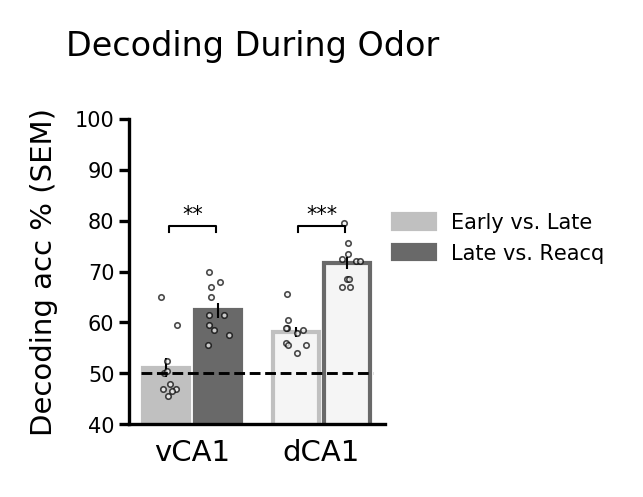

In [60]:
from matplotlib.patches import Patch
width = 0.89  # the width of the bars
loops = 10
v={}
d={}
bar={}
fig, ax = pl.subplots(figsize=(1.1,1.35))
for sess,i,lab,c in zip(['prepost','postrenew'],range(2),['Early vs. Late','Late vs. Reacq'],['silver','dimgrey']):
    v[sess] = np.array(np.std(distinct_CS_vhpc[sess][:loops])/np.sqrt(loops)*100)
    exec("bar%s = ax.bar(i, np.mean(distinct_CS_vhpc[sess][:loops])*100, width, color=c,edgecolor=c,yerr=v[sess],label=lab)"%i)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(distinct_CS_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(distinct_CS_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 2.5,  np.mean(distinct_CS_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
    ax.scatter(i+2.5+np.random.random(loops)*width/2-width/4.5,np.array(distinct_CS_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

#colmap=['coolwarm','autumn_r']
#def gradientbars(bars):
#    grad = np.atleast_2d(np.linspace(0,1,256)).T
#    ax = bars[0].axes
#    lim = ax.get_xlim()+ax.get_ylim()
#    for bar in bars:
#        bar.set_zorder(1)
#        bar.set_facecolor("none")
#        x,y = bar.get_xy()
#        w, h = bar.get_width(), bar.get_height()
#        ax.imshow(grad, extent=[x,x+w,40,y+h], aspect="auto", zorder=0,cmap='bone')
#    ax.axis(lim)
#
#for i in range(2):
#    gradientbars(eval("bar%s"%i))

pvs=[]
for i in range(1):
    pvs.append(add_significance(ax, distinct_CS_vhpc['prepost'][:loops], distinct_CS_vhpc['postrenew'][:loops],
        .05,.95,79+i*5,mcc=2))
    pvs.append(add_significance(ax, distinct_CS_dhpc['prepost'][:loops], distinct_CS_dhpc['postrenew'][:loops],
        2.55,3.45,79+i*5,mcc=2))
    print "vCA1",report_stats(distinct_CS_vhpc['prepost'][:loops], distinct_CS_vhpc['postrenew'][:loops])
    print "dCA1",report_stats(distinct_CS_dhpc['prepost'][:loops], distinct_CS_dhpc['postrenew'][:loops])

pl.suptitle('Decoding During Odor',y=1.1,fontsize=8)
fig.savefig('../final-ish figures/%s_bars_CS_xsess_comp.pdf'%NOTEBOOK_NAME)

vCA1 U = 0.0 p = 0.000180634720808 r = -0.845154254729
None
dCA1 U = 0.0 p = 0.000181651146091 r = -0.845154254729
None


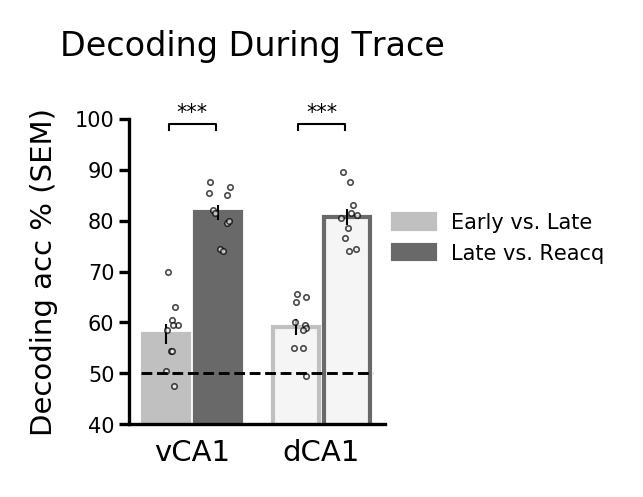

In [59]:
from matplotlib.patches import Patch
width = 0.89  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.1,1.35))
for sess,i,lab,c in zip(['prepost','postrenew'],range(2),['Early vs. Late','Late vs. Reacq'],['silver','dimgrey']):
    v[sess] = np.array(np.std(distinct_tr_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(distinct_tr_vhpc[sess][:loops])*100, width, color=c,edgecolor=c,yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(distinct_tr_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(distinct_tr_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 2.5,  np.mean(distinct_tr_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
    ax.scatter(i+2.5+np.random.random(loops)*width/2-width/4.5,np.array(distinct_tr_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for i in range(1):
    pvs.append(add_significance(ax, distinct_tr_vhpc['prepost'][:loops], distinct_tr_vhpc['postrenew'][:loops],
        .05,.95,99+i*5,mcc=2))
    pvs.append(add_significance(ax, distinct_tr_dhpc['prepost'][:loops], distinct_tr_dhpc['postrenew'][:loops],
        2.55,3.45,99+i*5,mcc=2))
    print "vCA1",report_stats(distinct_tr_vhpc['prepost'][:loops], distinct_tr_vhpc['postrenew'][:loops])
    print "dCA1",report_stats(distinct_tr_dhpc['prepost'][:loops], distinct_tr_dhpc['postrenew'][:loops])

pl.suptitle('Decoding During Trace',y=1.1,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_tr_xsess_comp.pdf'%NOTEBOOK_NAME)

In [36]:
# PLOT % CHANGE FOR WITHIN VS ACROSS
#concatenate late and reinstate scores
for reg in 'dhpc','vhpc':
    exec("post_renew_CS_%s = []"%(reg))
    for loop in range(10):
        exec("post_renew_CS_%s.append(np.mean(distinct_%s['postrenew_post_post'][6][6][loop]))"%(reg,reg))
        exec("post_renew_CS_%s.append(np.mean(distinct_%s['postrenew_renew_renew'][6][6][loop]))"%(reg,reg))
    exec("post_renew_tr_%s = []"%(reg))
    for loop in range(10):
        exec("post_renew_tr_%s.append(np.mean(distinct_%s['postrenew_post_post'][8][8][loop]))"%(reg,reg))
        exec("post_renew_tr_%s.append(np.mean(distinct_%s['postrenew_renew_renew'][8][8][loop]))"%(reg,reg))
    exec("post_renew_US_%s = []"%(reg))
    for loop in range(10):
        exec("post_renew_US_%s.append(np.mean(distinct_%s['postrenew_post_post'][10][10][loop]))"%(reg,reg))
        exec("post_renew_US_%s.append(np.mean(distinct_%s['postrenew_renew_renew'][10][10][loop]))"%(reg,reg))
    

In [120]:
test = np.mean(distinct_dhpc['postrenew_post_renew'][6][6],1)-post_renew_CS_dhpc
print np.mean(test)

-0.10775


In [38]:
testb = (post_renew_CS_vhpc-np.mean(distinct_vhpc['postrenew_post_renew'][6][6],1))/post_renew_CS_vhpc
print testb

[ 0.12585034  0.11619718  0.1557971   0.08510638  0.0625      0.1609589
  0.16932907  0.19387755  0.27797834  0.12132353  0.14801444 -0.05833333
  0.03422053  0.01639344  0.10989011  0.24734982  0.1459854   0.00363636
  0.18367347  0.18085106]


In [39]:
for epoch,tb in zip(['CS','tr','US'],[6,8,10]):
    for reg in 'dhpc','vhpc':
        exec("delta_within_vs_across_%s_%s=(np.mean(distinct_%s['postrenew_post_renew'][%s][%s],1)-post_renew_%s_%s)/\
              post_renew_%s_%s"%(epoch,reg,reg,tb,tb,epoch,reg,epoch,reg))     

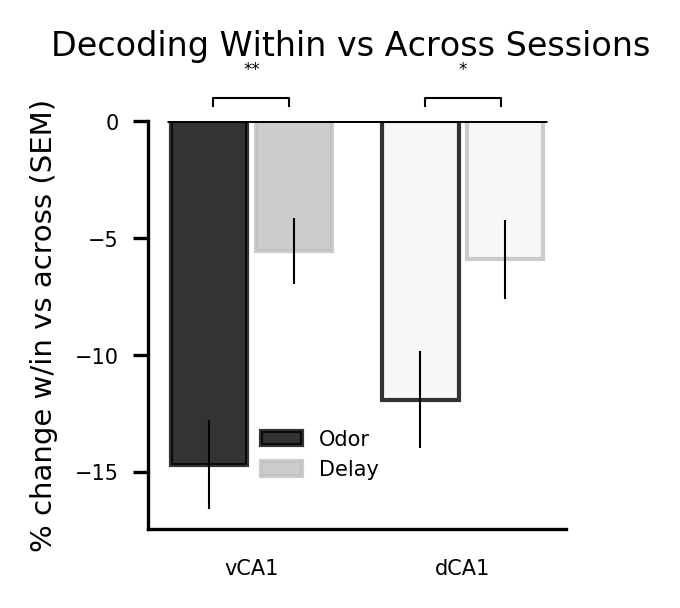

In [80]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.8,1.8))
#for sess,i,lab in zip(['CS','tr','US'],range(3),['Odor','Trace','Reward']):
for sess,i,lab,co,ed_co in zip(['CS','tr'],range(2),['Odor','Delay'],['k','silver'],['k','silver']):
    v[sess] = np.array(np.std(eval("delta_within_vs_across_%s_vhpc[:loops]*100"%(sess)))/(np.sqrt(loops-1)))
    ax.bar(i, np.mean(eval("delta_within_vs_across_%s_vhpc[:loops]*100"%(sess))), width, color=co,
                      edgecolor=ed_co,yerr=v[sess],label=lab,alpha=.8)
    d[sess] = np.array(np.std(eval("delta_within_vs_across_%s_dhpc[:loops]*100"%(sess)))/(np.sqrt(loops-1)))
    ax.bar(i + 2.5,  np.mean(eval("delta_within_vs_across_%s_dhpc[:loops]*100"%(sess))), width,color='whitesmoke', 
                             edgecolor=ed_co,yerr=d[sess],alpha=.8)
ax.hlines(0,-.5,4, color='k', lw=.7)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% change w/in vs across (SEM)')
#ax.set_title('Decoding During CS')
#ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'])
ax.set_yticks([0,-5,-10,-15])
ax.legend(loc=(.25,.1),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for reg,i in zip (['vhpc','dhpc'],[0,1]):
    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
                                eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
                                i*2.5+.05,i*2.5+.95,1,mcc=1))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+1.05,i*3.5+1.95,2,mcc=2))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+.05,i*3.5+1.95,4,mcc=2))

pl.suptitle('Decoding Within vs Across Sessions',y=1.05,fontsize=8)
pl.show()

#fig.savefig('../final-ish figures/%s_percent_change.pdf'%NOTEBOOK_NAME)

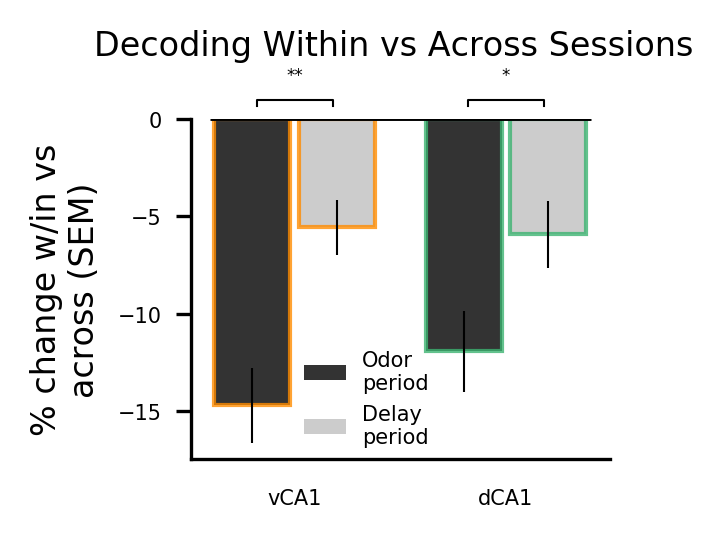

In [95]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.8,1.5))
#for sess,i,lab in zip(['CS','tr','US'],range(3),['Odor','Trace','Reward']):
for sess,i,lab,co,ed_co in zip(['CS','tr'],range(2),['Odor','Delay'],['k','silver'],['k','silver']):
    v[sess] = np.array(np.std(eval("delta_within_vs_across_%s_vhpc[:loops]*100"%(sess)))/(np.sqrt(loops-1)))
    ax.bar(i, np.mean(eval("delta_within_vs_across_%s_vhpc[:loops]*100"%(sess))), width, color=co,
                      edgecolor='darkorange',yerr=v[sess],label=lab,alpha=.8)
    d[sess] = np.array(np.std(eval("delta_within_vs_across_%s_dhpc[:loops]*100"%(sess)))/(np.sqrt(loops-1)))
    ax.bar(i + 2.5,  np.mean(eval("delta_within_vs_across_%s_dhpc[:loops]*100"%(sess))), width,color=co, 
                             edgecolor='mediumseagreen',yerr=d[sess],alpha=.8)
ax.hlines(0,-.5,4, color='k', lw=.7)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% change w/in vs\nacross (SEM)',fontsize=8)
#ax.set_title('Decoding During CS')
#ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'])
ax.set_yticks([0,-5,-10,-15])
ax.legend([Patch(facecolor='k',alpha=.8),Patch(facecolor='silver',alpha=.8)],['Odor\nperiod','Delay\nperiod'],loc=(.25,.01),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for reg,i in zip (['vhpc','dhpc'],[0,1]):
    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
                                eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
                                i*2.5+.05,i*2.5+.95,1,mcc=1))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+1.05,i*3.5+1.95,2,mcc=2))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+.05,i*3.5+1.95,4,mcc=2))

pl.suptitle('Decoding Within vs Across Sessions',y=1.08,fontsize=8)
pl.show()

#fig.savefig('../final-ish figures/%s_percent_change.pdf'%NOTEBOOK_NAME)

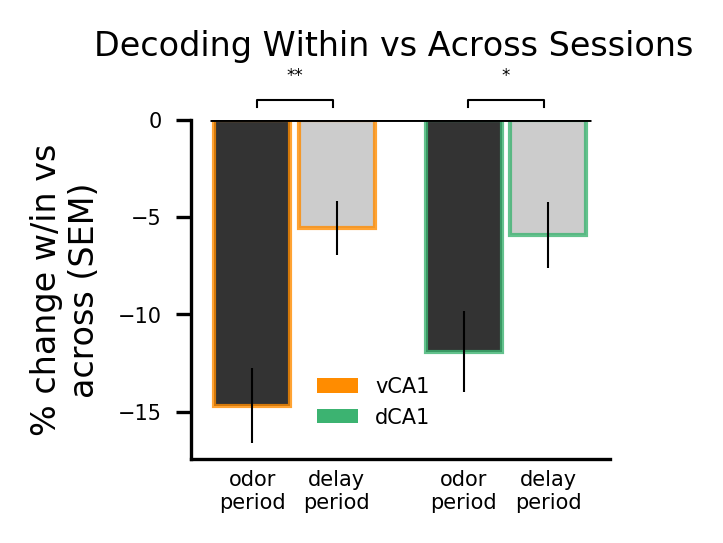

In [112]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(1.8,1.5))
#for sess,i,lab in zip(['CS','tr','US'],range(3),['Odor','Trace','Reward']):
for sess,i,lab,co,ed_co in zip(['CS','tr'],range(2),['Odor','Delay'],['k','silver'],['k','silver']):
    v[sess] = np.array(np.std(eval("delta_within_vs_across_%s_vhpc[:loops]*100"%(sess)))/(np.sqrt(loops-1)))
    ax.bar(i, np.mean(eval("delta_within_vs_across_%s_vhpc[:loops]*100"%(sess))), width, color=co,
                      edgecolor='darkorange',yerr=v[sess],label=lab,alpha=.8)
    d[sess] = np.array(np.std(eval("delta_within_vs_across_%s_dhpc[:loops]*100"%(sess)))/(np.sqrt(loops-1)))
    ax.bar(i + 2.5,  np.mean(eval("delta_within_vs_across_%s_dhpc[:loops]*100"%(sess))), width,color=co, 
                             edgecolor='mediumseagreen',yerr=d[sess],alpha=.8)
ax.hlines(0,-.5,4, color='k', lw=.7)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% change w/in vs\nacross (SEM)',fontsize=8)
#ax.set_title('Decoding During CS')
#ax.set_ylim(40,100)
ax.set_xticks([0,1,2.5,3.5])
ax.set_xticklabels(['odor\nperiod','delay\nperiod','odor\nperiod','delay\nperiod'])
ax.set_yticks([0,-5,-10,-15])
ax.legend([Patch(facecolor='darkorange'),Patch(facecolor='mediumseagreen')],['vCA1','dCA1'],loc=(.28,.07),frameon=False)
ax.tick_params(axis='x',bottom=False,pad=-1)

pvs=[]
for reg,i in zip (['vhpc','dhpc'],[0,1]):
    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
                                eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
                                i*2.5+.05,i*2.5+.95,1,mcc=1))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+1.05,i*3.5+1.95,2,mcc=2))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+.05,i*3.5+1.95,4,mcc=2))

pl.suptitle('Decoding Within vs Across Sessions',y=1.08,fontsize=8)
pl.show()

fig.savefig('../final-ish figures/%s_percent_change.pdf'%NOTEBOOK_NAME)

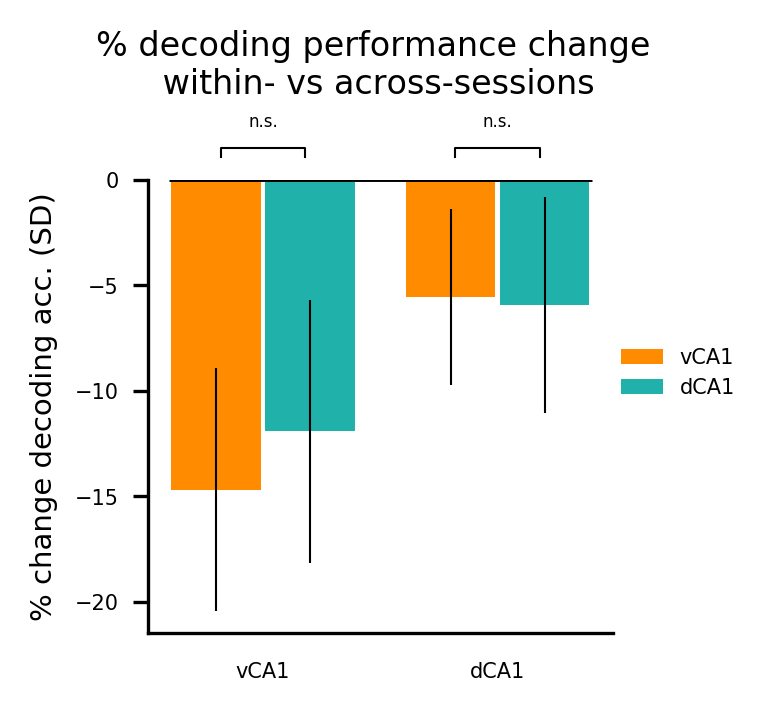

In [41]:
from matplotlib.patches import Patch
width = 0.95  # the width of the bars
loops = 10
v={}
d={}
fig, ax = pl.subplots(figsize=(2,2))
#for sess,i,lab in zip(['CS','tr','US'],range(3),['Odor','Trace','Reward']):
for sess,i,lab,co,ed_co in zip(['vhpc','dhpc'],range(2),['vCA1','dCA1'],['darkorange','lightseagreen'],['k','grey']):
    v[sess] = np.array(np.std(eval("delta_within_vs_across_CS_%s[:loops]*100"%(sess))))
    ax.bar(i, np.mean(eval("delta_within_vs_across_CS_%s[:loops]*100"%(sess))), width, color=co,
                      yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(eval("delta_within_vs_across_tr_%s[:loops]*100"%(sess))))
    ax.bar(i + 2.5,  np.mean(eval("delta_within_vs_across_tr_%s[:loops]*100"%(sess))), width,color=co, 
                             yerr=d[sess])
ax.hlines(0,-.5,4, color='k', lw=.7)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% change decoding acc. (SD)')
#ax.set_title('Decoding During CS')
#ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'])
ax.set_yticks([0,-5,-10,-15,-20])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
for reg,i in zip (['CS','tr'],[0,1]):
    pvs.append(add_significance(ax, eval("delta_within_vs_across_%s_vhpc[:loops]"%(reg)),
                                eval("delta_within_vs_across_%s_dhpc[:loops]"%(reg)),
                                i*2.5+.05,i*2.5+.95,1.5,mcc=1))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_tr_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+1.05,i*3.5+1.95,2,mcc=2))
#    pvs.append(add_significance(ax, eval("delta_within_vs_across_CS_%s[:loops]"%(reg)),
#                                eval("delta_within_vs_across_US_%s[:loops]"%(reg)),
#                                i*3.5+.05,i*3.5+1.95,4,mcc=2))

pl.suptitle('% decoding performance change\n within- vs across-sessions',y=1.13,fontsize=8)
pl.show()

fig.savefig('../final-ish figures/%s_percent_change_dVSv.pdf'%NOTEBOOK_NAME)

In [42]:
save_workspace(db)

Could not store variable 'cm'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
